# Importing Libraries

Importing standard libraries necessary to organize and split data for neural network training. To use the LSTM Recurrent neural network, we use the tensorflow library keras. The model uses "Adam" as the optimizer and the activation function used is "Relu"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse

In [2]:
ld = pd.read_csv("Load_data.csv")
ld.head()

,Load
0,1001
1,967
2,946
3,939
4,934


17544

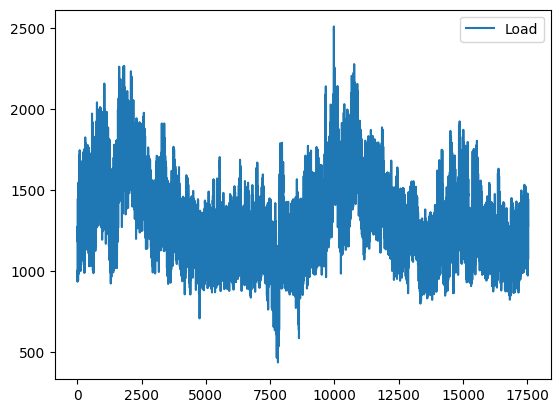

In [3]:
ld.plot()
ld.size

In [4]:
da = pd.date_range(start='11/1/2003', end='11/1/2005', periods=17545, closed='right')
r = np.array(da, dtype='datetime64[h]')
rr = pd.DataFrame(r, columns=['Time'])
rr.tail()


C:\Users\prede\AppData\Local\Temp\ipykernel_3996\1644015983.py:1: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  da = pd.date_range(start='11/1/2003', end='11/1/2005', periods=17545, closed='right')


,Time
17539,2005-10-31 20:00:00
17540,2005-10-31 21:00:00
17541,2005-10-31 22:00:00
17542,2005-10-31 23:00:00
17543,2005-11-01 00:00:00


In [5]:
ldd = pd.concat([rr, ld], axis=1)
ldd.Time = pd.to_datetime(ldd.Time)
print(ldd.info())
ldd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    17544 non-null  datetime64[ns]
 1   Load    17544 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 274.2 KB
None


,Time,Load
0,2003-11-01 01:00:00,1001
1,2003-11-01 02:00:00,967
2,2003-11-01 03:00:00,946
3,2003-11-01 04:00:00,939
4,2003-11-01 05:00:00,934


In [6]:
temp = pd.read_csv("temp.csv")
ldt = pd.concat([ldd, temp], axis=1)
ldt=ldt.set_index("Time")
ldt.head()
#The dataframe including the temperature data

,Load,Temp (C)
Time,,
2003-11-01 01:00:00,1001,16.8
2003-11-01 02:00:00,967,15.9
2003-11-01 03:00:00,946,15.9
2003-11-01 04:00:00,939,16.9
2003-11-01 05:00:00,934,16.3


In [7]:
# ldt.plot(y='Load', xlim=[dt.datetime(2005,2,1,1,0,0),dt.datetime(2005,2,8,23,0,0)])

In [8]:
#Generating the time in "Seconds" to generate a cos and sin map for periodicity relevance
ldt['Sec'] = ldt.index.map(pd.Timestamp.timestamp)
ldt

,Load,Temp (C),Sec
Time,,,
2003-11-01 01:00:00,1001,16.8,1.067648e+09
2003-11-01 02:00:00,967,15.9,1.067652e+09
2003-11-01 03:00:00,946,15.9,1.067656e+09
2003-11-01 04:00:00,939,16.9,1.067659e+09
2003-11-01 05:00:00,934,16.3,1.067663e+09
...,...,...,...
2005-10-31 20:00:00,1352,11.7,1.130789e+09
2005-10-31 21:00:00,1348,11.3,1.130792e+09
2005-10-31 22:00:00,1266,11.4,1.130796e+09


In [9]:
day = 86400 
#86400 is the number of seconds in a day
year = 31556952 
#31556952 is the number of seconds in an year

ldt['DSin'] = np.sin(ldt['Sec'] * (2*np.pi /day))
ldt['DCos'] = np.cos(ldt['Sec'] * (2*np.pi /day))
ldt['YSin'] = np.sin(ldt['Sec'] * (2*np.pi /year))
ldt['YCos'] = np.cos(ldt['Sec'] * (2*np.pi /year))
ldt.head()

,Load,Temp (C),Sec,DSin,DCos,YSin,YCos
Time,,,,,,,
2003-11-01 01:00:00,1001,16.8,1.067648e+09,0.258819,0.965926,-0.868846,0.495082
2003-11-01 02:00:00,967,15.9,1.067652e+09,0.500000,0.866025,-0.868491,0.495704
2003-11-01 03:00:00,946,15.9,1.067656e+09,0.707107,0.707107,-0.868136,0.496327
2003-11-01 04:00:00,939,16.9,1.067659e+09,0.866025,0.500000,-0.867780,0.496949
2003-11-01 05:00:00,934,16.3,1.067663e+09,0.965926,0.258819,-0.867423,0.497571


In [10]:
ldt =ldt.drop('Sec', axis=1)
ldt.head()
#Dropping the "Seconds" column

,Load,Temp (C),DSin,DCos,YSin,YCos
Time,,,,,,
2003-11-01 01:00:00,1001,16.8,0.258819,0.965926,-0.868846,0.495082
2003-11-01 02:00:00,967,15.9,0.500000,0.866025,-0.868491,0.495704
2003-11-01 03:00:00,946,15.9,0.707107,0.707107,-0.868136,0.496327
2003-11-01 04:00:00,939,16.9,0.866025,0.500000,-0.867780,0.496949
2003-11-01 05:00:00,934,16.3,0.965926,0.258819,-0.867423,0.497571


The Day sin and cos values with the Year sin and cos values shows the model that there exists a periodicity with a period of 24 hrs and as well as an whole year since the whole year is periodic in nature with offsets based on variable usage

## Splitting the dataset based on seasons

In [11]:
win = pd.concat([ldt['2003-12-01':'2004-02-29'],ldt['2004-12-01':'2005-02-28']])
frames = [ldt['2003-11-01':'2003-11-30'],ldt['2004-09-01':'2004-11-30'],ldt['2005-09-01':'2005-10-30']]
fal = pd.concat(frames)
spr = pd.concat([ldt['2004-03-01':'2004-05-31'],ldt['2005-03-01':'2005-05-31']])
sue = pd.concat([ldt['2004-06-01':'2004-08-31'],ldt['2005-06-01':'2005-08-31']])


win.to_csv('win.csv',index=False)
fal.to_csv('fal.csv',index=False)
spr.to_csv('spr.csv',index=False)
sue.to_csv('sum.csv',index=False)

In [12]:
len(sue['2004-06-01':'2004-08-31'])

2208

## Sliding Window

In [13]:
#We generate the sliding window which is required for the LSTM model. The window size can be arbitrary and can depend on the dataset. Here, we use 5 hours of previous data to predict the next hour, Hence the size of the window will be 5. This can also be changed later for further tweaks to increase the accuracy of the model.
def dataframe_win(df, w_size=7):
    df_np = df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_np)-w_size):
        row =[r for r in df_np[i:i+w_size]]
        X.append(row)
        label = df_np[i+w_size][0]
        y.append(label)
    return np.array(X), np.array(y)


# Winter season dataset training and prediction

In [14]:
X, y = dataframe_win(win)
X.shape, y.shape

((4337, 7, 6), (4337,))

In [15]:
X_train, y_train = X[:2184], y[:2184]
X_val, y_val = X[2184:3672], y[2184:3672]
X_test, y_test = X[3672:], y[3672:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2184, 7, 6), (2184,), (1488, 7, 6), (1488,), (665, 7, 6), (665,))

In [16]:
load_train_mean = np.mean(X_train[:, :, 0])
load_train_std = np.std(X_train[:, :, 0])

temp_train_mean = np.mean(X_train[:, :, 1])
temp_train_std = np.std(X_train[:, :, 1])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - load_train_mean) / load_train_std
  X[:, :, 1] = (X[:, :, 1] - temp_train_mean) / temp_train_std

def preprocess_output(y):
  y[:] = (y[:] - load_train_mean) / load_train_std
  


In [17]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

In [18]:
model = Sequential()
model.add(InputLayer((7, 6)))
model.add(GRU(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                13824     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 14,353
Trainable params: 14,353
Non-trainable params: 0
_________________________________________________________________


In [19]:
cp = ModelCheckpoint('modelWIN_GRU/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [20]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp])

Epoch 1/20
61/69 [=========================>....] - ETA: 0s - loss: 1.0177 - root_mean_squared_error: 1.0088

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 13s 134ms/step - loss: 0.9922 - root_mean_squared_error: 0.9961 - val_loss: 0.8081 - val_root_mean_squared_error: 0.8989
Epoch 2/20
65/69 [===========================>..] - ETA: 0s - loss: 0.5814 - root_mean_squared_error: 0.7625

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 7s 107ms/step - loss: 0.5751 - root_mean_squared_error: 0.7583 - val_loss: 0.4534 - val_root_mean_squared_error: 0.6733
Epoch 3/20
63/69 [==========================>...] - ETA: 0s - loss: 0.3694 - root_mean_squared_error: 0.6078

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 9s 126ms/step - loss: 0.3658 - root_mean_squared_error: 0.6048 - val_loss: 0.2979 - val_root_mean_squared_error: 0.5458
Epoch 4/20
68/69 [============================>.] - ETA: 0s - loss: 0.2753 - root_mean_squared_error: 0.5247

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 7s 103ms/step - loss: 0.2751 - root_mean_squared_error: 0.5245 - val_loss: 0.2381 - val_root_mean_squared_error: 0.4880
Epoch 5/20
61/69 [=========================>....] - ETA: 0s - loss: 0.2326 - root_mean_squared_error: 0.4823

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 8s 117ms/step - loss: 0.2322 - root_mean_squared_error: 0.4818 - val_loss: 0.2094 - val_root_mean_squared_error: 0.4576
Epoch 6/20
62/69 [=========================>....] - ETA: 0s - loss: 0.2029 - root_mean_squared_error: 0.4504

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 7s 105ms/step - loss: 0.2036 - root_mean_squared_error: 0.4512 - val_loss: 0.1903 - val_root_mean_squared_error: 0.4362
Epoch 7/20
63/69 [==========================>...] - ETA: 0s - loss: 0.1812 - root_mean_squared_error: 0.4257

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 8s 113ms/step - loss: 0.1808 - root_mean_squared_error: 0.4252 - val_loss: 0.1753 - val_root_mean_squared_error: 0.4187
Epoch 8/20
68/69 [============================>.] - ETA: 0s - loss: 0.1608 - root_mean_squared_error: 0.4010

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 7s 109ms/step - loss: 0.1617 - root_mean_squared_error: 0.4021 - val_loss: 0.1628 - val_root_mean_squared_error: 0.4035
Epoch 9/20
65/69 [===========================>..] - ETA: 0s - loss: 0.1472 - root_mean_squared_error: 0.3836

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 7s 109ms/step - loss: 0.1456 - root_mean_squared_error: 0.3816 - val_loss: 0.1522 - val_root_mean_squared_error: 0.3901
Epoch 10/20
62/69 [=========================>....] - ETA: 0s - loss: 0.1328 - root_mean_squared_error: 0.3645

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 7s 107ms/step - loss: 0.1317 - root_mean_squared_error: 0.3629 - val_loss: 0.1416 - val_root_mean_squared_error: 0.3764
Epoch 11/20
64/69 [==========================>...] - ETA: 0s - loss: 0.1224 - root_mean_squared_error: 0.3498

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 8s 121ms/step - loss: 0.1195 - root_mean_squared_error: 0.3457 - val_loss: 0.1329 - val_root_mean_squared_error: 0.3645
Epoch 12/20
67/69 [============================>.] - ETA: 0s - loss: 0.1094 - root_mean_squared_error: 0.3308

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 7s 103ms/step - loss: 0.1093 - root_mean_squared_error: 0.3306 - val_loss: 0.1255 - val_root_mean_squared_error: 0.3543
Epoch 13/20
65/69 [===========================>..] - ETA: 0s - loss: 0.1008 - root_mean_squared_error: 0.3175

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 8s 121ms/step - loss: 0.1003 - root_mean_squared_error: 0.3167 - val_loss: 0.1185 - val_root_mean_squared_error: 0.3442
Epoch 14/20
66/69 [===========================>..] - ETA: 0s - loss: 0.0927 - root_mean_squared_error: 0.3044

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 8s 118ms/step - loss: 0.0928 - root_mean_squared_error: 0.3046 - val_loss: 0.1131 - val_root_mean_squared_error: 0.3363
Epoch 15/20
69/69 [==============================] - ETA: 0s - loss: 0.0857 - root_mean_squared_error: 0.2927

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 8s 123ms/step - loss: 0.0857 - root_mean_squared_error: 0.2927 - val_loss: 0.1079 - val_root_mean_squared_error: 0.3285
Epoch 16/20
61/69 [=========================>....] - ETA: 0s - loss: 0.0787 - root_mean_squared_error: 0.2805

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 7s 102ms/step - loss: 0.0792 - root_mean_squared_error: 0.2814 - val_loss: 0.1029 - val_root_mean_squared_error: 0.3207
Epoch 17/20
66/69 [===========================>..] - ETA: 0s - loss: 0.0726 - root_mean_squared_error: 0.2694

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 8s 110ms/step - loss: 0.0730 - root_mean_squared_error: 0.2702 - val_loss: 0.0979 - val_root_mean_squared_error: 0.3129
Epoch 18/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0686 - root_mean_squared_error: 0.2619

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 7s 104ms/step - loss: 0.0679 - root_mean_squared_error: 0.2606 - val_loss: 0.0938 - val_root_mean_squared_error: 0.3063
Epoch 19/20
68/69 [============================>.] - ETA: 0s - loss: 0.0629 - root_mean_squared_error: 0.2508

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 8s 122ms/step - loss: 0.0628 - root_mean_squared_error: 0.2507 - val_loss: 0.0891 - val_root_mean_squared_error: 0.2986
Epoch 20/20
68/69 [============================>.] - ETA: 0s - loss: 0.0583 - root_mean_squared_error: 0.2415

INFO:tensorflow:Assets written to: modelWIN_GRU\assets


INFO:tensorflow:Assets written to: modelWIN_GRU\assets


69/69 [==============================] - 7s 104ms/step - loss: 0.0585 - root_mean_squared_error: 0.2419 - val_loss: 0.0865 - val_root_mean_squared_error: 0.2942


In [21]:
from tensorflow.keras.models import load_model
model = load_model('modelWIN_GRU/')

In [22]:
def postprocess_output(y):
  y[:] = (y[:] * load_train_std)  + load_train_mean
  

In [23]:
l_preds = model.predict(X_test).flatten()
l_actuals = y_test

m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(l_actuals, l_preds)
rms= m.result().numpy()
print("The root mean squared error for the prediction:", rms , "->" , (rms*100),"%")

21/21 [==============================] - 1s 5ms/step
The root mean squared error for the prediction: 0.23252499 -> 23.252499103546143 %


In [24]:
postprocess_output(l_preds)
postprocess_output(l_actuals)

C:\Users\prede\AppData\Local\Temp\ipykernel_3996\247656550.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: title={'center': 'Load Prediction for Feb 5th,2005 to Feb 8th,2005'}, xlabel='Date and Time', ylabel='Load (Kw)'>

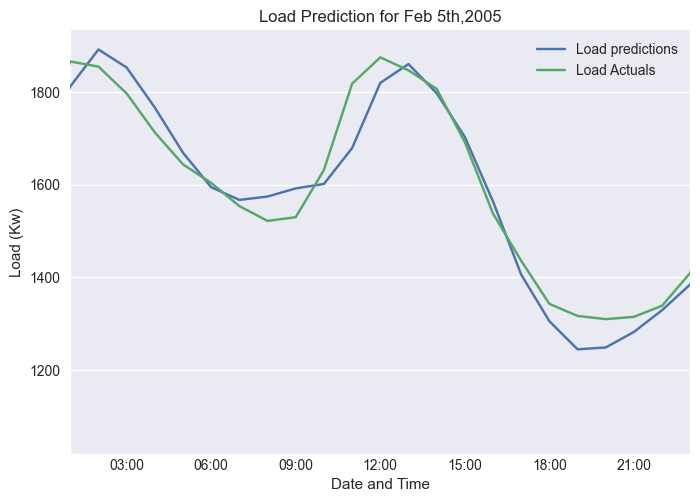

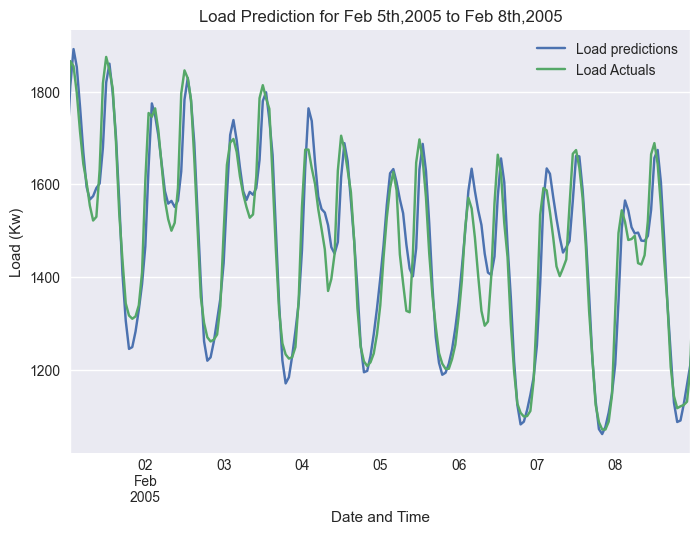

In [25]:
df = pd.DataFrame(data={'Load predictions': l_preds,
                          'Load Actuals':l_actuals,  })

#df.plot(xlim=[100,200])

temp=ldt['2005-02-01':'2005-02-28']
feb=temp.reset_index()

plt.style.use('seaborn')



winter= pd.concat([feb,df], axis=1)
winter.set_index("Time")
winter.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,2,1,1,0,0),dt.datetime(2005,2,1,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for Feb 5th,2005')
winter.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,2,1,1,0,0),dt.datetime(2005,2,8,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for Feb 5th,2005 to Feb 8th,2005')


# Spring season dataset training and prediction

In [26]:
X, y = dataframe_win(spr)
X.shape, y.shape

((4409, 7, 6), (4409,))

In [27]:
X_train, y_train = X[:2208], y[:2208]
X_val, y_val = X[2208:3672], y[2208:3672]
X_test, y_test = X[3672:], y[3672:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2208, 7, 6), (2208,), (1464, 7, 6), (1464,), (737, 7, 6), (737,))

In [28]:
load_train_mean = np.mean(X_train[:, :, 0])
load_train_std = np.std(X_train[:, :, 0])

temp_train_mean = np.mean(X_train[:, :, 1])
temp_train_std = np.std(X_train[:, :, 1])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - load_train_mean) / load_train_std
  X[:, :, 1] = (X[:, :, 1] - temp_train_mean) / temp_train_std

def preprocess_output(y):
  y[:] = (y[:] - load_train_mean) / load_train_std
  


In [29]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

In [30]:
model = Sequential()
model.add(InputLayer((7, 6)))
model.add(GRU(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                13824     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 14,353
Trainable params: 14,353
Non-trainable params: 0
_________________________________________________________________


In [32]:
cp = ModelCheckpoint('modelSPR_GRU/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [33]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp])

Epoch 1/20
65/69 [===========================>..] - ETA: 0s - loss: 0.8813 - root_mean_squared_error: 0.9388

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 11s 121ms/step - loss: 0.8789 - root_mean_squared_error: 0.9375 - val_loss: 0.6037 - val_root_mean_squared_error: 0.7770
Epoch 2/20
62/69 [=========================>....] - ETA: 0s - loss: 0.5561 - root_mean_squared_error: 0.7458

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 8s 118ms/step - loss: 0.5459 - root_mean_squared_error: 0.7389 - val_loss: 0.3931 - val_root_mean_squared_error: 0.6270
Epoch 3/20
61/69 [=========================>....] - ETA: 0s - loss: 0.3746 - root_mean_squared_error: 0.6120

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 7s 102ms/step - loss: 0.3653 - root_mean_squared_error: 0.6044 - val_loss: 0.2889 - val_root_mean_squared_error: 0.5375
Epoch 4/20
68/69 [============================>.] - ETA: 0s - loss: 0.2627 - root_mean_squared_error: 0.5126

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 8s 119ms/step - loss: 0.2625 - root_mean_squared_error: 0.5124 - val_loss: 0.2397 - val_root_mean_squared_error: 0.4895
Epoch 5/20
61/69 [=========================>....] - ETA: 0s - loss: 0.2080 - root_mean_squared_error: 0.4561

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 7s 104ms/step - loss: 0.2059 - root_mean_squared_error: 0.4538 - val_loss: 0.2133 - val_root_mean_squared_error: 0.4618
Epoch 6/20
60/69 [=========================>....] - ETA: 0s - loss: 0.1763 - root_mean_squared_error: 0.4199

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 7s 105ms/step - loss: 0.1734 - root_mean_squared_error: 0.4165 - val_loss: 0.1945 - val_root_mean_squared_error: 0.4410
Epoch 7/20
62/69 [=========================>....] - ETA: 0s - loss: 0.1511 - root_mean_squared_error: 0.3887

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 7s 96ms/step - loss: 0.1491 - root_mean_squared_error: 0.3862 - val_loss: 0.1764 - val_root_mean_squared_error: 0.4200
Epoch 8/20
61/69 [=========================>....] - ETA: 0s - loss: 0.1300 - root_mean_squared_error: 0.3605

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 7s 108ms/step - loss: 0.1293 - root_mean_squared_error: 0.3596 - val_loss: 0.1575 - val_root_mean_squared_error: 0.3968
Epoch 9/20
62/69 [=========================>....] - ETA: 0s - loss: 0.1149 - root_mean_squared_error: 0.3390

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 7s 98ms/step - loss: 0.1139 - root_mean_squared_error: 0.3374 - val_loss: 0.1422 - val_root_mean_squared_error: 0.3771
Epoch 10/20
65/69 [===========================>..] - ETA: 0s - loss: 0.1012 - root_mean_squared_error: 0.3181

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 9s 126ms/step - loss: 0.1019 - root_mean_squared_error: 0.3191 - val_loss: 0.1311 - val_root_mean_squared_error: 0.3621
Epoch 11/20
69/69 [==============================] - ETA: 0s - loss: 0.0927 - root_mean_squared_error: 0.3045

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 8s 117ms/step - loss: 0.0927 - root_mean_squared_error: 0.3045 - val_loss: 0.1224 - val_root_mean_squared_error: 0.3498
Epoch 12/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0860 - root_mean_squared_error: 0.2933

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 9s 127ms/step - loss: 0.0856 - root_mean_squared_error: 0.2926 - val_loss: 0.1102 - val_root_mean_squared_error: 0.3319
Epoch 13/20
63/69 [==========================>...] - ETA: 0s - loss: 0.0792 - root_mean_squared_error: 0.2813

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 8s 113ms/step - loss: 0.0794 - root_mean_squared_error: 0.2818 - val_loss: 0.1036 - val_root_mean_squared_error: 0.3219
Epoch 14/20
69/69 [==============================] - ETA: 0s - loss: 0.0742 - root_mean_squared_error: 0.2723

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 8s 119ms/step - loss: 0.0742 - root_mean_squared_error: 0.2723 - val_loss: 0.0934 - val_root_mean_squared_error: 0.3056
Epoch 15/20
63/69 [==========================>...] - ETA: 0s - loss: 0.0700 - root_mean_squared_error: 0.2646

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 8s 115ms/step - loss: 0.0696 - root_mean_squared_error: 0.2639 - val_loss: 0.0883 - val_root_mean_squared_error: 0.2972
Epoch 16/20
62/69 [=========================>....] - ETA: 0s - loss: 0.0659 - root_mean_squared_error: 0.2567

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 8s 119ms/step - loss: 0.0660 - root_mean_squared_error: 0.2569 - val_loss: 0.0822 - val_root_mean_squared_error: 0.2866
Epoch 17/20
61/69 [=========================>....] - ETA: 0s - loss: 0.0635 - root_mean_squared_error: 0.2519

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 8s 114ms/step - loss: 0.0626 - root_mean_squared_error: 0.2501 - val_loss: 0.0772 - val_root_mean_squared_error: 0.2779
Epoch 18/20
67/69 [============================>.] - ETA: 0s - loss: 0.0595 - root_mean_squared_error: 0.2440

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 8s 121ms/step - loss: 0.0594 - root_mean_squared_error: 0.2437 - val_loss: 0.0723 - val_root_mean_squared_error: 0.2689
Epoch 19/20
61/69 [=========================>....] - ETA: 0s - loss: 0.0566 - root_mean_squared_error: 0.2379

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 9s 126ms/step - loss: 0.0568 - root_mean_squared_error: 0.2384 - val_loss: 0.0685 - val_root_mean_squared_error: 0.2617
Epoch 20/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0545 - root_mean_squared_error: 0.2334

INFO:tensorflow:Assets written to: modelSPR_GRU\assets


INFO:tensorflow:Assets written to: modelSPR_GRU\assets


69/69 [==============================] - 9s 126ms/step - loss: 0.0542 - root_mean_squared_error: 0.2327 - val_loss: 0.0631 - val_root_mean_squared_error: 0.2513


In [34]:
from tensorflow.keras.models import load_model
model = load_model('modelSPR_GRU/')

In [35]:
def postprocess_output(y):
  y[:] = (y[:] * load_train_std)  + load_train_mean


In [36]:
l_preds = model.predict(X_test).flatten()
l_actuals = y_test

m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(l_actuals, l_preds)
rms= m.result().numpy()
print("The root mean squared error for the prediction:", rms , "->" , (rms*100),"%")


24/24 [==============================] - 1s 3ms/step
The root mean squared error for the prediction: 0.2609468 -> 26.09468102455139 %


In [37]:
postprocess_output(l_preds)
postprocess_output(l_actuals)

<AxesSubplot: title={'center': 'Load Prediction for May 5th,2005 to May 8th,2005'}, xlabel='Date and Time', ylabel='Load (Kw)'>

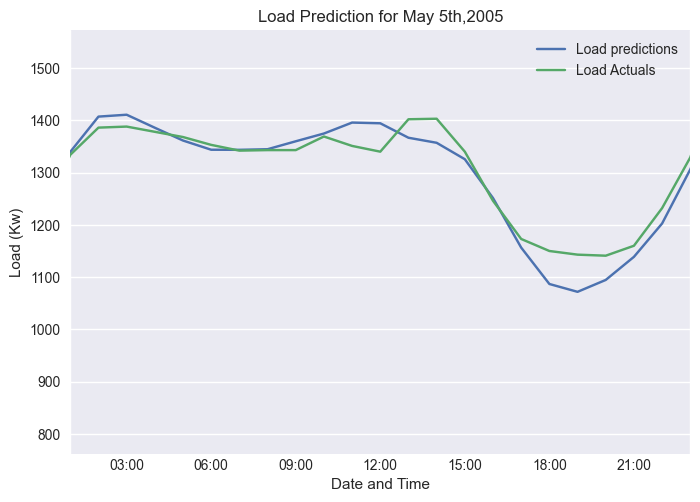

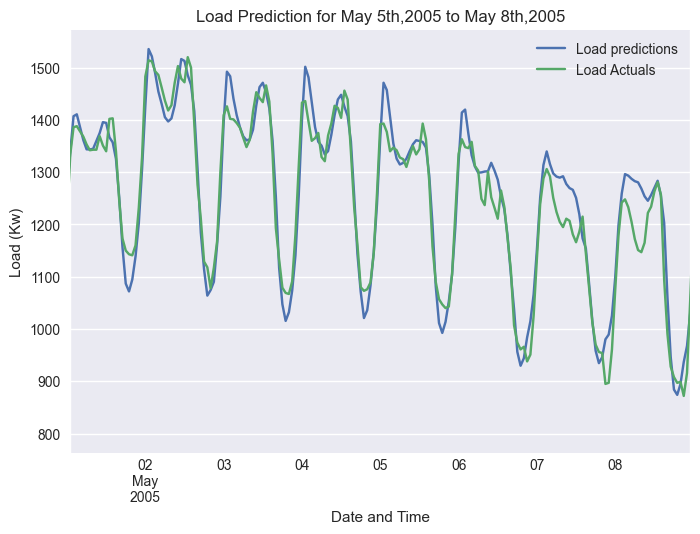

In [38]:

df = pd.DataFrame(data={'Load predictions': l_preds,
                          'Load Actuals':l_actuals,  })

#df.plot(xlim=[100,200])

temp=ldt['2005-05-01':'2005-05-31']
may=temp.reset_index()

# pd.concat([df.set_index(cols).value for df in dfs],axis=1, keys=keys)
spring= pd.concat([may,df], axis=1)
spring.set_index("Time")
spring.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,5,1,1,0,0),dt.datetime(2005,5,1,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for May 5th,2005')
spring.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,5,1,1,0,0),dt.datetime(2005,5,8,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for May 5th,2005 to May 8th,2005')

# Summer season dataset training and prediction

In [39]:
X, y = dataframe_win(sue)
X.shape, y.shape

((4409, 7, 6), (4409,))

In [40]:
X_train, y_train = X[:2208], y[:2208]
X_val, y_val = X[2208:3672], y[2208:3672]
X_test, y_test = X[3672:], y[3672:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2208, 7, 6), (2208,), (1464, 7, 6), (1464,), (737, 7, 6), (737,))

In [41]:
load_train_mean = np.mean(X_train[:, :, 0])
load_train_std = np.std(X_train[:, :, 0])

temp_train_mean = np.mean(X_train[:, :, 1])
temp_train_std = np.std(X_train[:, :, 1])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - load_train_mean) / load_train_std
  X[:, :, 1] = (X[:, :, 1] - temp_train_mean) / temp_train_std

def preprocess_output(y):
  y[:] = (y[:] - load_train_mean) / load_train_std



In [42]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

In [43]:
model = Sequential()
model.add(InputLayer((7, 6)))
model.add(GRU(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                13824     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 14,353
Trainable params: 14,353
Non-trainable params: 0
_________________________________________________________________


In [44]:
cp = ModelCheckpoint('modelSUE_GRU/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [45]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp])

Epoch 1/20
62/69 [=========================>....] - ETA: 0s - loss: 0.9868 - root_mean_squared_error: 0.9934

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 12s 131ms/step - loss: 0.9711 - root_mean_squared_error: 0.9855 - val_loss: 1.1699 - val_root_mean_squared_error: 1.0816
Epoch 2/20
62/69 [=========================>....] - ETA: 0s - loss: 0.7288 - root_mean_squared_error: 0.8537

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 8s 116ms/step - loss: 0.7258 - root_mean_squared_error: 0.8519 - val_loss: 0.8758 - val_root_mean_squared_error: 0.9358
Epoch 3/20
63/69 [==========================>...] - ETA: 0s - loss: 0.6600 - root_mean_squared_error: 0.8124

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 8s 112ms/step - loss: 0.6527 - root_mean_squared_error: 0.8079 - val_loss: 0.7239 - val_root_mean_squared_error: 0.8508
Epoch 4/20
59/69 [========================>.....] - ETA: 0s - loss: 0.6193 - root_mean_squared_error: 0.7870

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 7s 107ms/step - loss: 0.6067 - root_mean_squared_error: 0.7789 - val_loss: 0.6202 - val_root_mean_squared_error: 0.7875
Epoch 5/20
67/69 [============================>.] - ETA: 0s - loss: 0.5304 - root_mean_squared_error: 0.7283

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 8s 115ms/step - loss: 0.5292 - root_mean_squared_error: 0.7275 - val_loss: 0.4919 - val_root_mean_squared_error: 0.7014
Epoch 6/20
69/69 [==============================] - ETA: 0s - loss: 0.3982 - root_mean_squared_error: 0.6310

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 8s 112ms/step - loss: 0.3982 - root_mean_squared_error: 0.6310 - val_loss: 0.3639 - val_root_mean_squared_error: 0.6033
Epoch 7/20
68/69 [============================>.] - ETA: 0s - loss: 0.2600 - root_mean_squared_error: 0.5099

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 8s 113ms/step - loss: 0.2599 - root_mean_squared_error: 0.5098 - val_loss: 0.2605 - val_root_mean_squared_error: 0.5104
Epoch 8/20
63/69 [==========================>...] - ETA: 0s - loss: 0.1644 - root_mean_squared_error: 0.4055

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 7s 110ms/step - loss: 0.1604 - root_mean_squared_error: 0.4004 - val_loss: 0.1977 - val_root_mean_squared_error: 0.4447
Epoch 9/20
65/69 [===========================>..] - ETA: 0s - loss: 0.1111 - root_mean_squared_error: 0.3334

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 8s 112ms/step - loss: 0.1095 - root_mean_squared_error: 0.3309 - val_loss: 0.1611 - val_root_mean_squared_error: 0.4013
Epoch 10/20
62/69 [=========================>....] - ETA: 0s - loss: 0.0894 - root_mean_squared_error: 0.2989

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 7s 109ms/step - loss: 0.0898 - root_mean_squared_error: 0.2997 - val_loss: 0.1505 - val_root_mean_squared_error: 0.3879
Epoch 11/20
68/69 [============================>.] - ETA: 0s - loss: 0.0798 - root_mean_squared_error: 0.2826

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 9s 125ms/step - loss: 0.0794 - root_mean_squared_error: 0.2817 - val_loss: 0.1392 - val_root_mean_squared_error: 0.3731
Epoch 12/20
69/69 [==============================] - ETA: 0s - loss: 0.0713 - root_mean_squared_error: 0.2670

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 8s 111ms/step - loss: 0.0713 - root_mean_squared_error: 0.2670 - val_loss: 0.1315 - val_root_mean_squared_error: 0.3627
Epoch 13/20
67/69 [============================>.] - ETA: 0s - loss: 0.0644 - root_mean_squared_error: 0.2538

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 8s 116ms/step - loss: 0.0648 - root_mean_squared_error: 0.2545 - val_loss: 0.1239 - val_root_mean_squared_error: 0.3521
Epoch 14/20
60/69 [=========================>....] - ETA: 0s - loss: 0.0599 - root_mean_squared_error: 0.2447

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 8s 112ms/step - loss: 0.0595 - root_mean_squared_error: 0.2440 - val_loss: 0.1143 - val_root_mean_squared_error: 0.3381
Epoch 15/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0553 - root_mean_squared_error: 0.2352

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 8s 111ms/step - loss: 0.0553 - root_mean_squared_error: 0.2352 - val_loss: 0.1050 - val_root_mean_squared_error: 0.3240
Epoch 16/20
63/69 [==========================>...] - ETA: 0s - loss: 0.0523 - root_mean_squared_error: 0.2287

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 8s 116ms/step - loss: 0.0520 - root_mean_squared_error: 0.2279 - val_loss: 0.0978 - val_root_mean_squared_error: 0.3127
Epoch 17/20
64/69 [==========================>...] - ETA: 0s - loss: 0.0500 - root_mean_squared_error: 0.2237

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 7s 96ms/step - loss: 0.0492 - root_mean_squared_error: 0.2219 - val_loss: 0.0918 - val_root_mean_squared_error: 0.3030
Epoch 18/20
63/69 [==========================>...] - ETA: 0s - loss: 0.0471 - root_mean_squared_error: 0.2171

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 7s 105ms/step - loss: 0.0471 - root_mean_squared_error: 0.2170 - val_loss: 0.0836 - val_root_mean_squared_error: 0.2891
Epoch 19/20
69/69 [==============================] - ETA: 0s - loss: 0.0447 - root_mean_squared_error: 0.2115

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 7s 103ms/step - loss: 0.0447 - root_mean_squared_error: 0.2115 - val_loss: 0.0768 - val_root_mean_squared_error: 0.2771
Epoch 20/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0436 - root_mean_squared_error: 0.2088

INFO:tensorflow:Assets written to: modelSUE_GRU\assets


INFO:tensorflow:Assets written to: modelSUE_GRU\assets


69/69 [==============================] - 7s 104ms/step - loss: 0.0430 - root_mean_squared_error: 0.2073 - val_loss: 0.0749 - val_root_mean_squared_error: 0.2736


In [46]:
from tensorflow.keras.models import load_model
model = load_model('modelSUE_GRU/')

In [47]:
def postprocess_output(y):
  y[:] = (y[:] * load_train_std)  + load_train_mean
  

In [48]:
l_preds = model.predict(X_test).flatten()
l_actuals = y_test

m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(l_actuals, l_preds)
rms= m.result().numpy()
print("The root mean squared error for the prediction:", rms , "->" , (rms*100),"%")



24/24 [==============================] - 1s 5ms/step
The root mean squared error for the prediction: 0.2042617 -> 20.426170527935028 %


In [49]:
postprocess_output(l_preds)
postprocess_output(l_actuals)

<AxesSubplot: title={'center': 'Load Prediction for Aug 20th,2005 to Aug 28th,2005'}, xlabel='Date and Time', ylabel='Load (Kw)'>

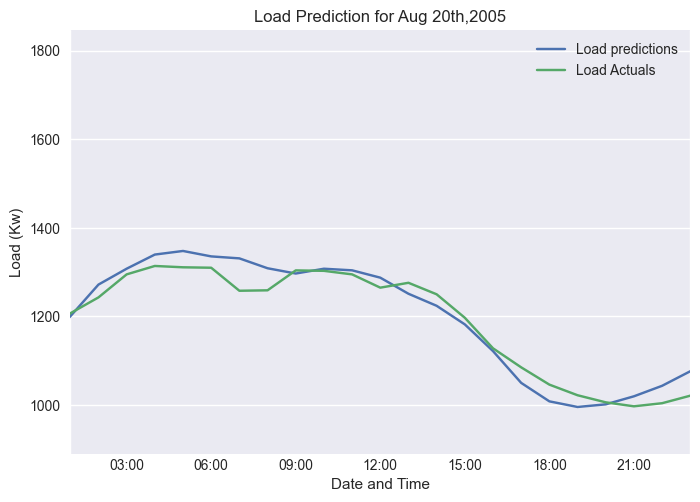

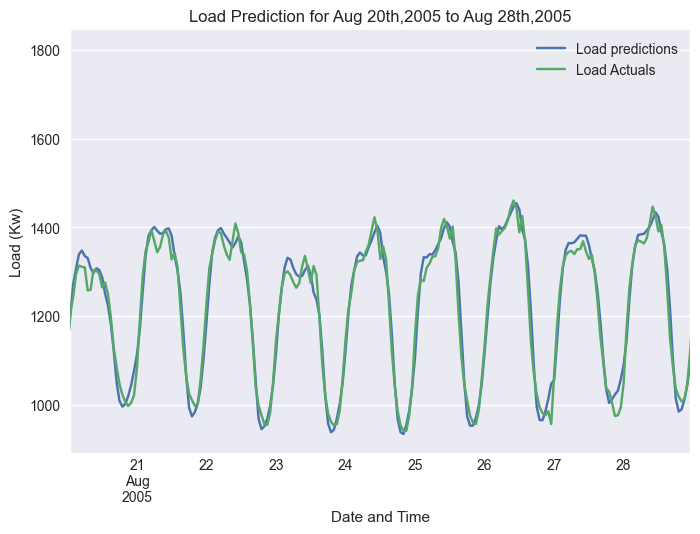

In [50]:
df = pd.DataFrame(data={'Load predictions': l_preds,
                          'Load Actuals':l_actuals,  })

#df.plot(xlim=[100,200])

temp=ldt['2005-08-01':'2005-08-31']
aug=temp.reset_index()

# pd.concat([df.set_index(cols).value for df in dfs],axis=1, keys=keys)
summer= pd.concat([aug,df], axis=1)
summer.set_index("Time")
summer.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,8,20,1,0,0),dt.datetime(2005,8,20,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for Aug 20th,2005')
summer.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,8,20,1,0,0),dt.datetime(2005,8,28,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for Aug 20th,2005 to Aug 28th,2005')


# Fall season dataset training and prediction

In [51]:
X, y = dataframe_win(fal)
X.shape, y.shape

((4336, 7, 6), (4336,))

In [52]:
X_train, y_train = X[:2184], y[:2184]
X_val, y_val = X[2184:3678], y[2184:3678]
X_test, y_test = X[3678:], y[3678:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2184, 7, 6), (2184,), (1494, 7, 6), (1494,), (658, 7, 6), (658,))

In [53]:
load_train_mean = np.mean(X_train[:, :, 0])
load_train_std = np.std(X_train[:, :, 0])

temp_train_mean = np.mean(X_train[:, :, 1])
temp_train_std = np.std(X_train[:, :, 1])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - load_train_mean) / load_train_std
  X[:, :, 1] = (X[:, :, 1] - temp_train_mean) / temp_train_std

def preprocess_output(y):
  y[:] = (y[:] - load_train_mean) / load_train_std



In [54]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

In [55]:
model = Sequential()
model.add(InputLayer((7, 6)))
model.add(GRU(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                13824     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 14,353
Trainable params: 14,353
Non-trainable params: 0
_________________________________________________________________


In [56]:
cp = ModelCheckpoint('modelFAL_GRU/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [57]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp])

Epoch 1/20
65/69 [===========================>..] - ETA: 0s - loss: 0.5317 - root_mean_squared_error: 0.7292

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 12s 119ms/step - loss: 0.5269 - root_mean_squared_error: 0.7259 - val_loss: 0.2158 - val_root_mean_squared_error: 0.4645
Epoch 2/20
63/69 [==========================>...] - ETA: 0s - loss: 0.3119 - root_mean_squared_error: 0.5585

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 7s 104ms/step - loss: 0.3093 - root_mean_squared_error: 0.5562 - val_loss: 0.1632 - val_root_mean_squared_error: 0.4040
Epoch 3/20
68/69 [============================>.] - ETA: 0s - loss: 0.2246 - root_mean_squared_error: 0.4739

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 7s 109ms/step - loss: 0.2248 - root_mean_squared_error: 0.4741 - val_loss: 0.1296 - val_root_mean_squared_error: 0.3600
Epoch 4/20
64/69 [==========================>...] - ETA: 0s - loss: 0.1848 - root_mean_squared_error: 0.4299

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 7s 98ms/step - loss: 0.1829 - root_mean_squared_error: 0.4276 - val_loss: 0.1073 - val_root_mean_squared_error: 0.3276
Epoch 5/20
62/69 [=========================>....] - ETA: 0s - loss: 0.1551 - root_mean_squared_error: 0.3938

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 8s 111ms/step - loss: 0.1554 - root_mean_squared_error: 0.3943 - val_loss: 0.0893 - val_root_mean_squared_error: 0.2988
Epoch 6/20
67/69 [============================>.] - ETA: 0s - loss: 0.1362 - root_mean_squared_error: 0.3690

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 8s 123ms/step - loss: 0.1356 - root_mean_squared_error: 0.3682 - val_loss: 0.0771 - val_root_mean_squared_error: 0.2777
Epoch 7/20
62/69 [=========================>....] - ETA: 0s - loss: 0.1224 - root_mean_squared_error: 0.3499

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 7s 109ms/step - loss: 0.1204 - root_mean_squared_error: 0.3469 - val_loss: 0.0703 - val_root_mean_squared_error: 0.2652
Epoch 8/20
66/69 [===========================>..] - ETA: 0s - loss: 0.1071 - root_mean_squared_error: 0.3273

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 8s 110ms/step - loss: 0.1088 - root_mean_squared_error: 0.3298 - val_loss: 0.0635 - val_root_mean_squared_error: 0.2520
Epoch 9/20
68/69 [============================>.] - ETA: 0s - loss: 0.0997 - root_mean_squared_error: 0.3157

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 8s 114ms/step - loss: 0.0998 - root_mean_squared_error: 0.3159 - val_loss: 0.0572 - val_root_mean_squared_error: 0.2391
Epoch 10/20
69/69 [==============================] - ETA: 0s - loss: 0.0919 - root_mean_squared_error: 0.3031

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 8s 116ms/step - loss: 0.0919 - root_mean_squared_error: 0.3031 - val_loss: 0.0522 - val_root_mean_squared_error: 0.2285
Epoch 11/20
67/69 [============================>.] - ETA: 0s - loss: 0.0844 - root_mean_squared_error: 0.2905

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 10s 143ms/step - loss: 0.0855 - root_mean_squared_error: 0.2924 - val_loss: 0.0489 - val_root_mean_squared_error: 0.2212
Epoch 12/20
66/69 [===========================>..] - ETA: 0s - loss: 0.0797 - root_mean_squared_error: 0.2823

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 10s 148ms/step - loss: 0.0800 - root_mean_squared_error: 0.2828 - val_loss: 0.0450 - val_root_mean_squared_error: 0.2122
Epoch 13/20
69/69 [==============================] - ETA: 0s - loss: 0.0754 - root_mean_squared_error: 0.2746

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 8s 120ms/step - loss: 0.0754 - root_mean_squared_error: 0.2746 - val_loss: 0.0426 - val_root_mean_squared_error: 0.2064
Epoch 14/20
62/69 [=========================>....] - ETA: 0s - loss: 0.0719 - root_mean_squared_error: 0.2682

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 7s 105ms/step - loss: 0.0709 - root_mean_squared_error: 0.2663 - val_loss: 0.0402 - val_root_mean_squared_error: 0.2006
Epoch 15/20
69/69 [==============================] - 1s 13ms/step - loss: 0.0676 - root_mean_squared_error: 0.2600 - val_loss: 0.0406 - val_root_mean_squared_error: 0.2014
Epoch 16/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0641 - root_mean_squared_error: 0.2532

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 7s 105ms/step - loss: 0.0646 - root_mean_squared_error: 0.2542 - val_loss: 0.0361 - val_root_mean_squared_error: 0.1900
Epoch 17/20
69/69 [==============================] - ETA: 0s - loss: 0.0623 - root_mean_squared_error: 0.2495

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 10s 143ms/step - loss: 0.0623 - root_mean_squared_error: 0.2495 - val_loss: 0.0353 - val_root_mean_squared_error: 0.1879
Epoch 18/20
65/69 [===========================>..] - ETA: 0s - loss: 0.0606 - root_mean_squared_error: 0.2463

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 8s 123ms/step - loss: 0.0603 - root_mean_squared_error: 0.2455 - val_loss: 0.0337 - val_root_mean_squared_error: 0.1835
Epoch 19/20
63/69 [==========================>...] - ETA: 0s - loss: 0.0583 - root_mean_squared_error: 0.2414

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 7s 104ms/step - loss: 0.0590 - root_mean_squared_error: 0.2428 - val_loss: 0.0316 - val_root_mean_squared_error: 0.1778
Epoch 20/20
63/69 [==========================>...] - ETA: 0s - loss: 0.0578 - root_mean_squared_error: 0.2404

INFO:tensorflow:Assets written to: modelFAL_GRU\assets


INFO:tensorflow:Assets written to: modelFAL_GRU\assets


69/69 [==============================] - 8s 113ms/step - loss: 0.0572 - root_mean_squared_error: 0.2392 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1762


In [58]:
from tensorflow.keras.models import load_model
model = load_model('modelFAL_GRU/')

In [59]:
def postprocess_output(y):
  y[:] = (y[:] * load_train_std)  + load_train_mean
  

In [60]:
l_preds = model.predict(X_test).flatten()
l_actuals = y_test

m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(l_actuals, l_preds)
rms= m.result().numpy()
print("The root mean squared error for the prediction:", rms , "->" , (rms*100),"%")



21/21 [==============================] - 1s 3ms/step
The root mean squared error for the prediction: 0.15047857 -> 15.047857165336609 %


In [61]:
postprocess_output(l_preds)
postprocess_output(l_actuals)

<AxesSubplot: title={'center': 'Load Prediction for Oct 1st,2005 to Oct 8th,2005'}, xlabel='Date and Time', ylabel='Load (Kw)'>

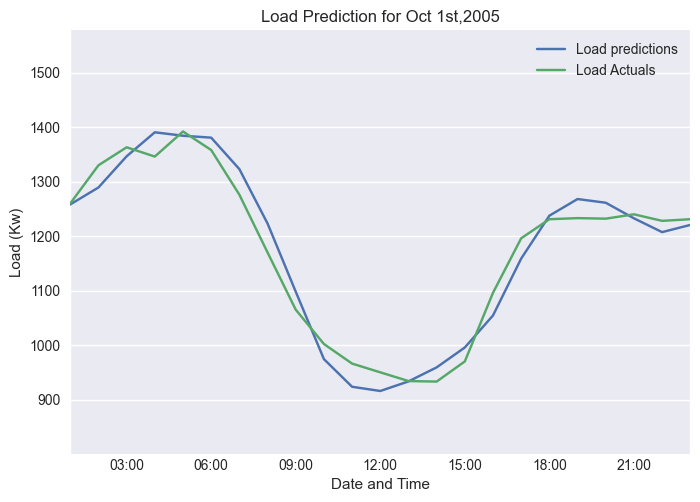

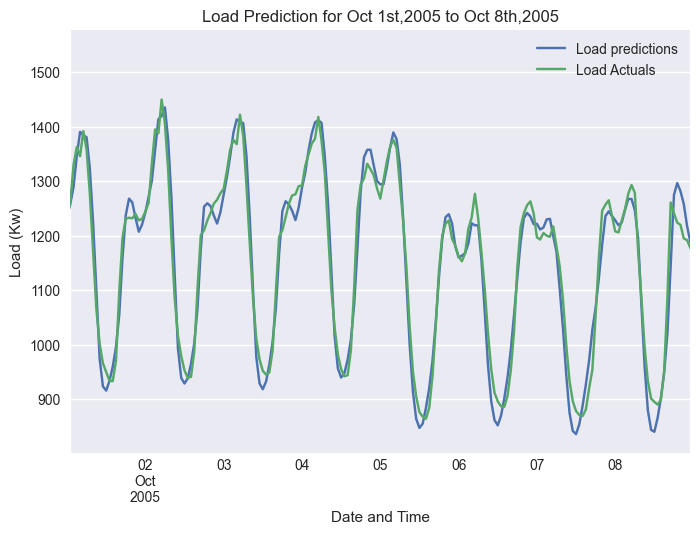

In [62]:
df = pd.DataFrame(data={'Load predictions': l_preds,
                          'Load Actuals':l_actuals,  })

#df.plot(xlim=[100,200])

temp=ldt['2005-10-01':'2005-10-30']
nov=temp.reset_index()

# pd.concat([df.set_index(cols).value for df in dfs],axis=1, keys=keys)
fall= pd.concat([nov,df], axis=1)
fall.set_index("Time")
fall.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,10,1,1,0,0),dt.datetime(2005,10,1,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for Oct 1st,2005')
fall.plot(x='Time',y=['Load predictions', "Load Actuals"], xlim=[dt.datetime(2005,10,1,1,0,0),dt.datetime(2005,10,8,23,0,0)], ylabel='Load (Kw)', xlabel='Date and Time',title='Load Prediction for Oct 1st,2005 to Oct 8th,2005')